In [29]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Models Libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluation Metric Libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score,f1_score, roc_auc_score

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [30]:
df=pd.read_csv(r'D:\Datasets\Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,278,CASH_IN,330218.42,C632336343,20866.00,351084.42,C834976624,452419.57,122201.15,0,0
1,15,PAYMENT,11647.08,C1264712553,30370.00,18722.92,M215391829,0.00,0.00,0,0
2,10,CASH_IN,152264.21,C1746846248,106589.00,258853.21,C1607284477,201303.01,49038.80,0,0
3,403,TRANSFER,1551760.63,C333676753,0.00,0.00,C1564353608,3198359.45,4750120.08,0,0
4,206,CASH_IN,78172.30,C813403091,2921331.58,2999503.88,C1091768874,415821.90,337649.60,0,0


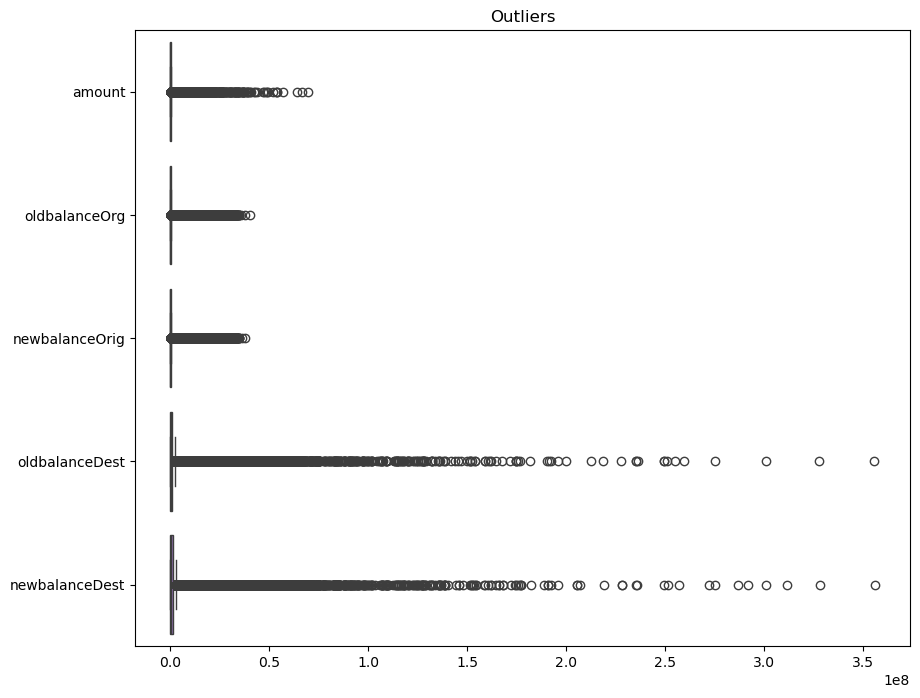

In [31]:
#outliers
%matplotlib inline
plt.figure(figsize=(10,8))
sns.boxplot(data=df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]],orient="h")
plt.title('Outliers')
plt.show()

In [32]:
df.drop(['isFlaggedFraud'], axis=1, inplace=True)

In [33]:
upper_limit=df["oldbalanceDest"].mean()+3*df["oldbalanceDest"].std()
lower_limit=df["oldbalanceDest"].mean()-3*df["oldbalanceDest"].std()
df=df[(df.oldbalanceDest<upper_limit) & (df.oldbalanceDest>lower_limit)]

In [34]:
upper_limit2=df["newbalanceDest"].mean()+3*df["newbalanceDest"].std()
lower_limit2=df["newbalanceDest"].mean()-3*df["newbalanceDest"].std()
df=df[(df.newbalanceDest<upper_limit2) & (df.newbalanceDest>lower_limit2)]

In [35]:
upper_limit3=df["oldbalanceOrg"].mean()+3*df["oldbalanceOrg"].std()
lower_limit3=df["oldbalanceOrg"].mean()-3*df["oldbalanceOrg"].std()
df=df[(df.oldbalanceOrg<upper_limit3) & (df.oldbalanceOrg>lower_limit3)]

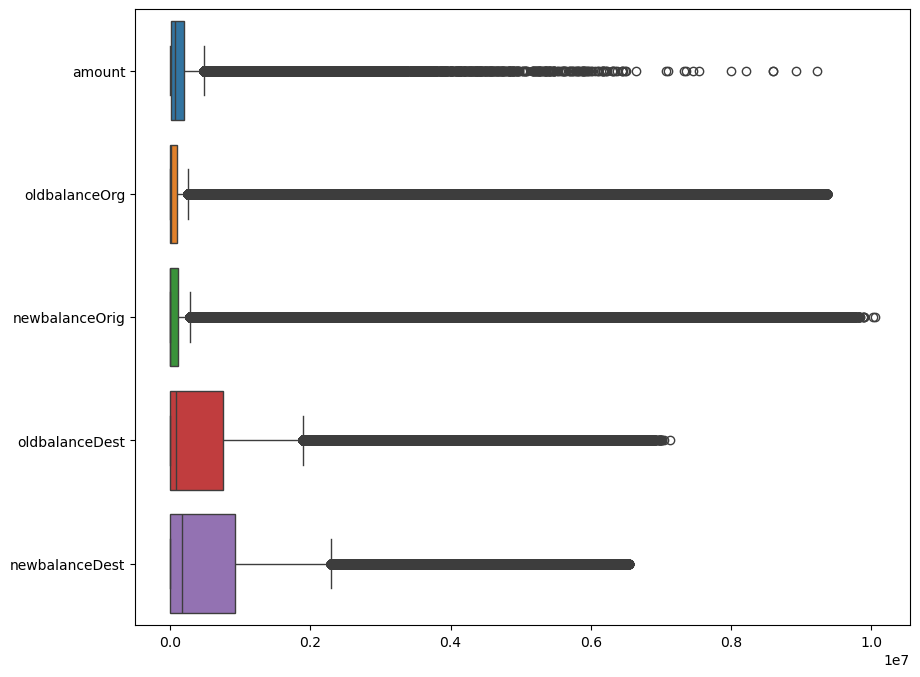

In [36]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]],orient="h")
plt.show()

In [45]:
df.drop(columns=["nameOrig","nameDest","nameOrig"],axis=1,inplace=True)

In [38]:
df['type'].unique()

array(['CASH_IN', 'PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT'],
      dtype=object)

In [39]:
df = pd.get_dummies(df, columns=['type'], drop_first=True)

In [41]:
bool_columns = ['type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']
df[bool_columns] = df[bool_columns].astype(int)

In [42]:
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,278,330218.42,C632336343,20866.00,351084.42,C834976624,452419.57,122201.15,0,0,0,0,0
1,15,11647.08,C1264712553,30370.00,18722.92,M215391829,0.00,0.00,0,0,0,1,0
2,10,152264.21,C1746846248,106589.00,258853.21,C1607284477,201303.01,49038.80,0,0,0,0,0
3,403,1551760.63,C333676753,0.00,0.00,C1564353608,3198359.45,4750120.08,0,0,0,0,1
4,206,78172.30,C813403091,2921331.58,2999503.88,C1091768874,415821.90,337649.60,0,0,0,0,0


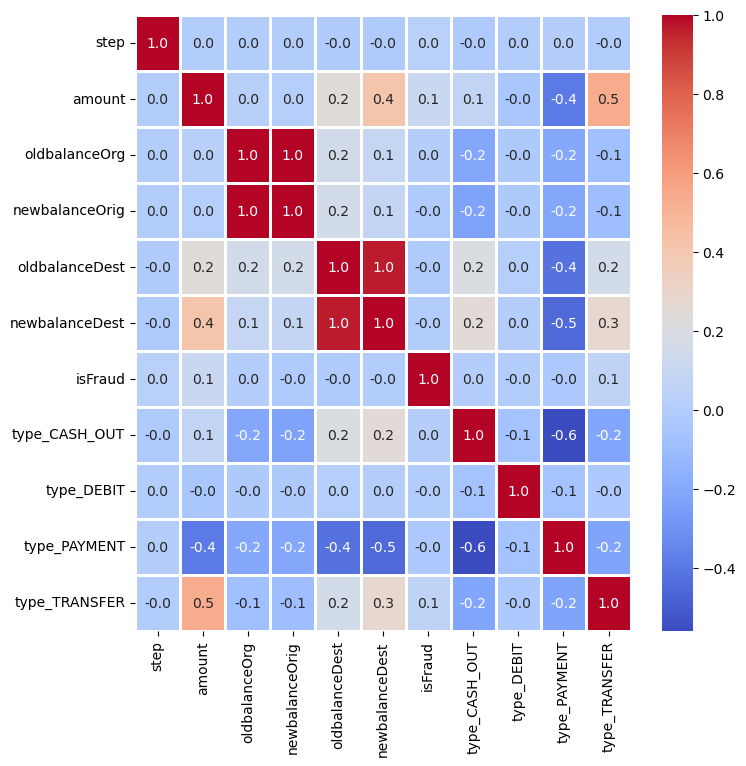

In [46]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, linewidths=0.9, fmt=".1f", cmap='coolwarm')
plt.show()

In [47]:
scale_data=["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[scale_data] = scaler.fit_transform(df[scale_data])

In [49]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,278,0.688047,-0.301907,-0.077493,-0.166481,-0.501210,0,0,0,0,0
1,15,-0.526157,-0.295137,-0.307639,-0.560809,-0.600988,0,0,0,1,0
2,10,0.009792,-0.240845,-0.141359,-0.385354,-0.560948,0,0,0,0,0
3,403,5.343838,-0.316771,-0.320604,2.226874,3.277503,0,0,0,0,1
4,206,-0.272602,1.764167,1.756431,-0.198380,-0.325296,0,0,0,0,0


In [50]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)

In [51]:
train_data=df.drop(columns="isFraud",axis=1)
label_data=df["isFraud"]

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data,label_data, test_size=0.2, random_state=42)

In [53]:
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [54]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
predict=model.predict(X_test)

In [56]:
print(f"Accuracy score : {accuracy_score(y_test,predict)}")

Accuracy score : 0.9997038162990449


In [57]:
label=["Non Fraud","Fraud"]

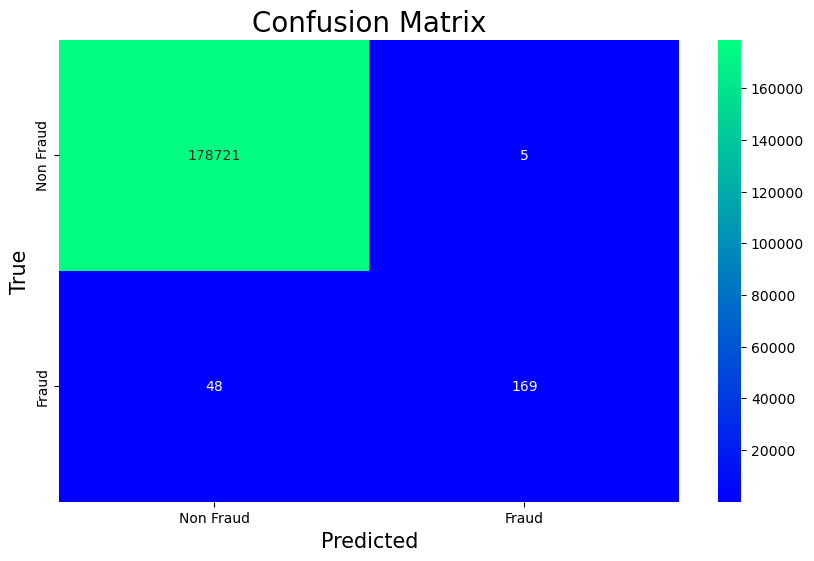

In [58]:
cf_matrix=confusion_matrix(y_test,predict)
plt.figure(figsize=(10,6))
sns.heatmap(cf_matrix,annot=True,fmt="d",xticklabels=label,yticklabels=label,cmap="winter")
plt.xlabel("Predicted",fontsize=15)
plt.ylabel("True",fontsize=15)
plt.title("Confusion Matrix",fontsize=20)
plt.show()

In [60]:
print(classification_report(y_test,predict,target_names=label))

              precision    recall  f1-score   support

   Non Fraud       1.00      1.00      1.00    178726
       Fraud       0.97      0.78      0.86       217

    accuracy                           1.00    178943
   macro avg       0.99      0.89      0.93    178943
weighted avg       1.00      1.00      1.00    178943

